# Learning curves has an important role in developing any machine learning algorithm. To understand the effect of changing the hyper parameters and their effect on deep network that we designed, draw two learning curves for Accuracy of test vs. epochs (start from 5 epochs and go up to 75 with the step of 5). Do this analysis two times:
# 1) With Adam algorithm
# 2) With SGD



### Before building the model, setting up the data, parameters and helper functions

In [1]:
#code using keras
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras import initializers
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Using TensorFlow backend.


1.12.0


In [2]:
#load dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', ' Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

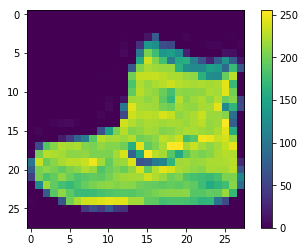

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
num_pixels = train_images.shape[1] * train_images.shape[2]
X_train = train_images.reshape(train_images.shape[0], num_pixels)
X_test = test_images.reshape(test_images.shape[0], num_pixels)

#normalize inputs from 0-255 to 0-1
x_train = X_train / 255
x_test = X_test / 255

Y_test = test_labels

#one hot encode outputs
y_train = np_utils.to_categorical(train_labels)
y_test = np_utils.to_categorical(test_labels)


hidden_nodes = 128
num_classes = y_test.shape[1]


In [9]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')



# 1) Building the baseline model with 128 hidden and ADAM optimizer

In [10]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(hidden_nodes, input_dim= num_pixels, kernel_initializer=initializers.TruncatedNormal(mean=0.0, stddev=0.1), activation='relu'))
    model.add(Dense(hidden_nodes, kernel_initializer=initializers.TruncatedNormal(mean=0.0, stddev=0.1), activation='relu'))
    model.add(Dense(num_classes, kernel_initializer=initializers.TruncatedNormal(mean=0.0, stddev=0.1), activation='softmax'))
    sgd = optimizers.SGD(lr=0.01, momentum=0.0, decay= 0.00)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
    return model


model = baseline_model()
epoch_ADAM = []
accuracy_ADAM = []

'''
Splitting the loop from 5 to 75 epochs into 3 differetn iterations as it was taking way too long to run and even longer to crash 
in times of errors. I have the same reason for bringing the batch size to as low as it is below.
'''

In [11]:
for i in range(5,20,5):
    # Fit the model
    epoch_ADAM.append(i)
    nn_simple = model.fit(x_train, y_train, epochs=i, batch_size=10)
    # Final evaluation of the model
    scores = model.evaluate(x_test, y_test)
    accuracy_ADAM.append(scores[1]*100)

Epoch 1/5
60000/60000 [==============================] - 16s 275us/step - loss: 0.4736 - acc: 0.8284
Epoch 2/5
60000/60000 [==============================] - 16s 267us/step - loss: 0.3642 - acc: 0.8664
Epoch 3/5
60000/60000 [==============================] - 16s 263us/step - loss: 0.3322 - acc: 0.8776
Epoch 4/5
60000/60000 [==============================] - 16s 263us/step - loss: 0.3097 - acc: 0.8853
Epoch 5/5
10000/10000 [==============================] - 0s 39us/step
Epoch 1/10
60000/60000 [==============================] - 15s 255us/step - loss: 0.2804 - acc: 0.8952
Epoch 2/10
60000/60000 [==============================] - 15s 255us/step - loss: 0.2694 - acc: 0.9001
Epoch 3/10
60000/60000 [==============================] - 15s 252us/step - loss: 0.2605 - acc: 0.9021
Epoch 4/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.2522 - acc: 0.9055
Epoch 5/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.2429 - acc: 0.9086
Epoch 6/10
60000

In [12]:
for i in range(25,45,5):
    # Fit the model
    epoch_ADAM.append(i)
    nn_simple = model.fit(x_train, y_train, epochs=i, batch_size=10)
    # Final evaluation of the model
    scores = model.evaluate(x_test, y_test)
    accuracy_ADAM.append(scores[1]*100)

Epoch 1/25
60000/60000 [==============================] - 14s 230us/step - loss: 0.1708 - acc: 0.9361
Epoch 2/25
60000/60000 [==============================] - 14s 229us/step - loss: 0.1696 - acc: 0.9369
Epoch 3/25
60000/60000 [==============================] - 14s 226us/step - loss: 0.1695 - acc: 0.9365
Epoch 4/25
60000/60000 [==============================] - 14s 226us/step - loss: 0.1674 - acc: 0.9363
Epoch 5/25
60000/60000 [==============================] - 14s 228us/step - loss: 0.1684 - acc: 0.9379
Epoch 6/25
60000/60000 [==============================] - 14s 230us/step - loss: 0.1647 - acc: 0.9388
Epoch 7/25
60000/60000 [==============================] - 14s 235us/step - loss: 0.1639 - acc: 0.9385
Epoch 8/25
60000/60000 [==============================] - 14s 230us/step - loss: 0.1609 - acc: 0.9401
Epoch 9/25
60000/60000 [==============================] - 14s 229us/step - loss: 0.1641 - acc: 0.9403
Epoch 10/25
60000/60000 [==============================] - 14s 228us/step - loss: 

In [13]:
for i in range(50,75,5):
    # Fit the model
    epoch_ADAM.append(i)
    nn_simple = model.fit(x_train, y_train, epochs=i, batch_size=10)
    # Final evaluation of the model
    scores = model.evaluate(x_test, y_test)
    accuracy_ADAM.append(scores[1]*100)

Epoch 1/50
60000/60000 [==============================] - 18s 299us/step - loss: 0.1049 - acc: 0.9657
Epoch 2/50
60000/60000 [==============================] - 19s 309us/step - loss: 0.1019 - acc: 0.9667
Epoch 3/50
60000/60000 [==============================] - 17s 286us/step - loss: 0.1084 - acc: 0.9653
Epoch 4/50
60000/60000 [==============================] - 19s 316us/step - loss: 0.1046 - acc: 0.9661
Epoch 5/50
60000/60000 [==============================] - 20s 326us/step - loss: 0.1122 - acc: 0.9656
Epoch 6/50
60000/60000 [==============================] - 19s 321us/step - loss: 0.1099 - acc: 0.9665
Epoch 7/50
60000/60000 [==============================] - 19s 317us/step - loss: 0.1042 - acc: 0.9670
Epoch 8/50
60000/60000 [==============================] - 19s 315us/step - loss: 0.1013 - acc: 0.9668
Epoch 9/50
60000/60000 [==============================] - 19s 314us/step - loss: 0.1063 - acc: 0.9664
Epoch 10/50
60000/60000 [==============================] - 19s 314us/step - loss: 

In [14]:
predictions_ADAM = model.predict(x_test)
predictions_ADAM[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

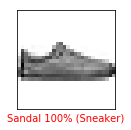

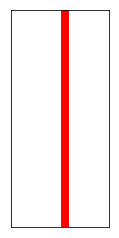

In [15]:
i = 12
plt.figure(figsize=(6,3))
plt.subplots_adjust(hspace=.5)
plt.subplot(1,3,1)
plot_image(i, predictions_ADAM, Y_test, test_images)
plt.show()
plt.subplot(1,3,2)
plot_value_array(i, predictions_ADAM,  Y_test)
plt.show()

# Building the baseline model with 128 hidden and SGD optimizer

In [16]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(hidden_nodes, input_dim= num_pixels, kernel_initializer=initializers.TruncatedNormal(mean=0.0, stddev=0.1), activation='relu'))
    model.add(Dense(hidden_nodes, kernel_initializer=initializers.TruncatedNormal(mean=0.0, stddev=0.1), activation='relu'))
    model.add(Dense(num_classes, kernel_initializer=initializers.TruncatedNormal(mean=0.0, stddev=0.1), activation='softmax'))
    sgd = optimizers.SGD(lr=0.01, momentum=0.0, decay= 0.00)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer= sgd, metrics=['accuracy'])
    return model


model = baseline_model()
epoch_SGD = []
accuracy_SGD = []

In [17]:
for i in range(5,20,5):
    # Fit the model
    epoch_SGD.append(i)
    nn_simple = model.fit(x_train, y_train, epochs=i, batch_size=10)
    # Final evaluation of the model
    scores = model.evaluate(x_test, y_test)
    accuracy_SGD.append(scores[1]*100)

Epoch 1/5
60000/60000 [==============================] - 15s 243us/step - loss: 0.5953 - acc: 0.7930
Epoch 2/5
60000/60000 [==============================] - 14s 232us/step - loss: 0.4275 - acc: 0.8472
Epoch 3/5
60000/60000 [==============================] - 14s 228us/step - loss: 0.3843 - acc: 0.8617
Epoch 4/5
60000/60000 [==============================] - 14s 230us/step - loss: 0.3571 - acc: 0.8699
Epoch 5/5
10000/10000 [==============================] - 1s 52us/step
Epoch 1/10
60000/60000 [==============================] - 14s 239us/step - loss: 0.3212 - acc: 0.8828
Epoch 2/10
60000/60000 [==============================] - 14s 228us/step - loss: 0.3084 - acc: 0.8868
Epoch 3/10
60000/60000 [==============================] - 14s 228us/step - loss: 0.2972 - acc: 0.8902
Epoch 4/10
60000/60000 [==============================] - 14s 240us/step - loss: 0.2873 - acc: 0.8938
Epoch 5/10
60000/60000 [==============================] - 14s 228us/step - loss: 0.2794 - acc: 0.8973
Epoch 6/10
60000

In [18]:
for i in range(25,45,5):
    # Fit the model
    epoch_SGD.append(i)
    nn_simple = model.fit(x_train, y_train, epochs=i, batch_size=10)
    # Final evaluation of the model
    scores = model.evaluate(x_test, y_test)
    accuracy_SGD.append(scores[1]*100)

Epoch 1/25
60000/60000 [==============================] - 14s 232us/step - loss: 0.1673 - acc: 0.9383
Epoch 2/25
60000/60000 [==============================] - 14s 240us/step - loss: 0.1646 - acc: 0.9395
Epoch 3/25
60000/60000 [==============================] - 14s 231us/step - loss: 0.1607 - acc: 0.9401
Epoch 4/25
60000/60000 [==============================] - 14s 240us/step - loss: 0.1569 - acc: 0.9417
Epoch 5/25
60000/60000 [==============================] - 14s 228us/step - loss: 0.1543 - acc: 0.9428
Epoch 6/25
60000/60000 [==============================] - 15s 251us/step - loss: 0.1520 - acc: 0.9439
Epoch 7/25
60000/60000 [==============================] - 15s 251us/step - loss: 0.1480 - acc: 0.9453
Epoch 8/25
60000/60000 [==============================] - 15s 246us/step - loss: 0.1460 - acc: 0.9457
Epoch 9/25
60000/60000 [==============================] - 15s 252us/step - loss: 0.1405 - acc: 0.9491
Epoch 10/25
60000/60000 [==============================] - 14s 233us/step - loss: 

In [19]:
for i in range(50,75,5):
    # Fit the model
    epoch_SGD.append(i)
    nn_simple = model.fit(x_train, y_train, epochs=i, batch_size=10)
    # Final evaluation of the model
    scores = model.evaluate(x_test, y_test)
    accuracy_SGD.append(scores[1]*100)

Epoch 1/50
60000/60000 [==============================] - 14s 231us/step - loss: 0.0018 - acc: 0.9999
Epoch 2/50
60000/60000 [==============================] - 14s 231us/step - loss: 0.0017 - acc: 1.0000
Epoch 3/50
60000/60000 [==============================] - 14s 232us/step - loss: 0.0026 - acc: 0.9995
Epoch 4/50
60000/60000 [==============================] - 14s 229us/step - loss: 0.0024 - acc: 0.9997
Epoch 5/50
60000/60000 [==============================] - 15s 245us/step - loss: 0.0019 - acc: 0.9999
Epoch 6/50
60000/60000 [==============================] - 14s 241us/step - loss: 0.0014 - acc: 1.0000
Epoch 7/50
60000/60000 [==============================] - 14s 229us/step - loss: 0.0013 - acc: 1.0000
Epoch 8/50
60000/60000 [==============================] - 14s 230us/step - loss: 0.0013 - acc: 1.0000
Epoch 9/50
60000/60000 [==============================] - 14s 229us/step - loss: 0.0012 - acc: 1.0000
Epoch 10/50
60000/60000 [==============================] - 14s 230us/step - loss: 

In [20]:
predictions_SGD = model.predict(x_test)
predictions_SGD[0]

array([7.85810980e-23, 1.01691153e-21, 2.10706071e-35, 1.43751219e-32,
       1.46073512e-24, 2.58964039e-15, 1.06472645e-29, 9.89005020e-14,
       4.00058674e-21, 1.00000000e+00], dtype=float32)

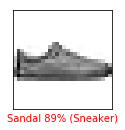

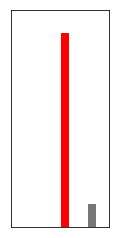

In [21]:
i = 12
plt.figure(figsize=(6,3))
plt.subplots_adjust(hspace=.5)
plt.subplot(1,3,1)
plot_image(i, predictions_SGD, Y_test, test_images)
plt.show()
plt.subplot(1,3,2)
plot_value_array(i, predictions_SGD,  Y_test)
plt.show()


## Comparing the accuracy graphs of ADAM and SGD optimizers. 

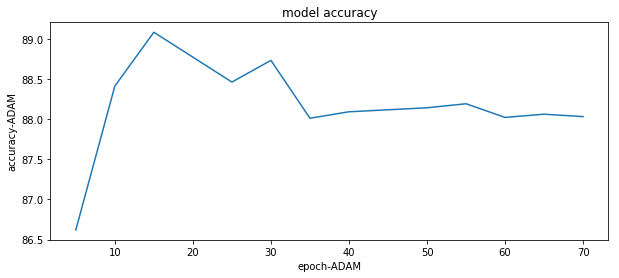

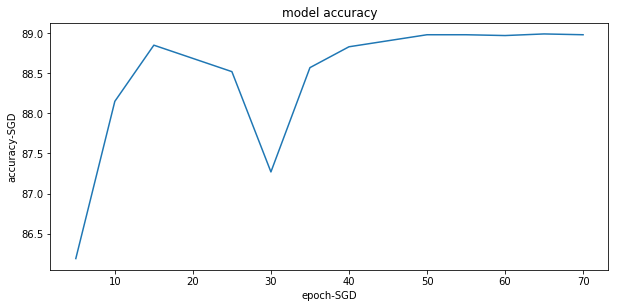

In [27]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,1,1)
plt.plot(epoch_ADAM, accuracy_ADAM)
plt.title('model accuracy')
plt.ylabel('accuracy-ADAM')
plt.xlabel('epoch-ADAM')
plt.show()
plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
plt.plot(epoch_SGD, accuracy_SGD)
plt.title('model accuracy')
plt.ylabel('accuracy-SGD')
plt.xlabel('epoch-SGD')
plt.show()

# It is seen ADAM works much better during the smaller epochs and then sees a decline in the accuracy. However, SGD starts off with lower accuracy and then  has a big dip before there is a steady increase in the accuracy.